In [ ]:
SVM
#We can see that there are two groups of sata. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for
#that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose? SVM solves this
#problem using the maximum margin as shown
#The black line in the middle is the optimum classifier. This line is drawn to maximise the distanceset the classifier line from the nearest points in the two
#classes. It is also called a hyperplane in terms of SVM A Hunerplane is en n-1 dimensional plane which ontimally divides the dal 1:43:18

In [ ]:
#SVM
#from sklearn.svm import SVC
#from sklearn.svm import SVR
#SVR for Regression
#As usual always refer sklean official documentation if you are not sure about syntax or parameter
#Introduction
#Support Vector Machine is a supervised Machine Learning algorithm widely used for solving different machine learning problems. Given a dataset, the
#algorithm tries to divide the data using hyperplanes and then makes the predictions. SVM is a non-probabilistic linear classifier. While other classifiers, when
#classifying, predict the ability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without

In [3]:
#Import necessory Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly
import warnings
warnings.filterwarnings ('ignore')


In [4]:
# Get the CSV data here and print head
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv', index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#print summary
print ('Shape ------>', df.shape)
print ('Each Column and data type and its count', '\n')
print(df.info())

Shape ------> (569, 32)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimet

In [5]:
#DROP ALERT 1: Unnamed:32 column has all nulls. Safe to remove the column.
df=df.drop(['Unnamed: 32'], axis=1)

In [6]:
df.shape

(569, 31)

In [7]:
df.describe() #statistics
#obj data will not show

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#Seems no other cols have nulls. It's safe to proceed.
#As we can see each feature data scaled differently


In [9]:
#Let's go ahead and scale the datascaler=StandardScaler()
scaler=StandardScaler()
X=df.drop('diagnosis', axis=1)
X_scaled = scaler.fit_transform(X)


In [ ]:
#Principal Component Analysis (PCA)
#PCA is dimension reduction technique (Not feature selection technique)
#PCA can be applied only on Features (not on target)
#PCA can be applied when you have too many features and their correlation is not that significant with target.
#PCA will also takes care of multicollinearity problem
#it is used when correlation not found between target n features, solves multi correlity-dimension reduction technique
#import from sklearn
#as an when u increase features e use this

In [10]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

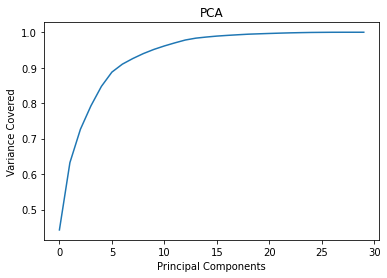

In [11]:
#Let's plot Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [12]:
#Around 13 Principal Components are able to explain > 95 % variance. Its safe to consider starting 13 PC's
pca=PCA(n_components=13)
new_pcomp=pca.fit_transform(X_scaled)
Princi_comp = pd.DataFrame(new_pcomp, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])
Princi_comp #PC 13 are the features

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157119,-0.877402,0.262948,-0.859011,0.103384
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813119,0.157924,-0.943530
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605602,0.124385,-0.410626
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151512,1.011315,-0.933270
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377705,0.651361,-0.110516,0.387948
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062646,0.123339,-0.051721
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0.244807,0.222751,-0.192635
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840513,0.096473,0.157417
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542036,-0.089297,-0.178634,-0.697461,1.225192


In [13]:
#Replace Label column (diagnosis) into binary codes
df['diagnosis'] = df['diagnosis'].replace({'M':1, 'B':0}) #converting maevolent nd b for benevolent in target to 0 and 1
y = df['diagnosis']


In [14]:
# Data split into train and test
x_train, x_test, y_train, y_test = train_test_split(Princi_comp, y, test_size=0.25, random_state=355)


In [15]:
def print_score(clf, x_train, x_test,y_train, y_test, train=True): #clf is classifier algorithm
    if train: #train is true, coz used for tst n train, it will pass if teain is true, if rain not true than it is test data
        y_pred=clf.predict(x_train)
        print("\n================Train Result========")
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
    elif train==False: #if tain false, it means it is test
              pred=clf.predict(x_test)
              print("\n‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒")
              print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
              print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))

In [25]:
from sklearn.svm import SVC
svc=SVC()
#svc Model training and printing train and test score
svc.fit(x_train,y_train)
#Call the function and pass dataset to check train and test score
print_score(svc, x_train, x_test, y_train, y_test, train=True)
print_score(svc, x_train, x_test, y_train, y_test, train=False)


================Train Result========
Accuracy Score: 98.12%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 97.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [16]:
from sklearn.ensemble import GradientBoostingClassifier  #same code as above only gradient used
gbdt=GradientBoostingClassifier()

#gradient boosting Model training and printing train and test score
gbdt.fit(x_train,y_train)

#Call the function and pass dataset to check train and test score
print_score(gbdt, x_train,x_test,y_train,y_test, train=True) 
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)

#gradiemt is 94% and svm is 98%. we see test result. train just helps to know how much model understood


================Train Result========
Accuracy Score: 100.00%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 94.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        93
           1       0.94      0.90      0.92        50

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143



In [17]:
from sklearn.ensemble import RandomForestClassifier #same code as above only randon forest used
rf = RandomForestClassifier()

# Random Forest Model training and printing train and test score
rf.fit(x_train,y_train)

# Call the function and pass dataset to check train and test score
print_score(rf, x_train,x_test,y_train,y_test, train=True)
print_score(rf, x_train,x_test,y_train,y_test, train=False)


================Train Result========
Accuracy Score: 100.00%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 95.10%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        93
           1       0.92      0.94      0.93        50

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [22]:
from sklearn.model_selection import GridSearchCV
#= It is a hypermeter in SVM to control error. How much cror we can allow.
#Low C means allowing Less number of error/s and
#Large C means allowing more number of errors.

#gamma= Gamma decides that how much curvature we want in a decision boundary. Gamma high means more curvature.
#Gamma Low means Less curvature.

#rbf is more popular than ploy, poly is used when data is deviated

#kernel tricks:
#What is poly SVM?
#In machine learning, the polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models,
#that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables,
#allowing learning of non-linear models.

#RBF Kernel is popular because of its similarity to K-Nearest Neighborhood Algorithm. 
#It has the advantages of K-NN and overcomes the space complexity problem as RBF Kernel Support Vector Machines
#just needs to store the support vectors during training and not the entire dataset.

In [26]:
param_grid = { "C" : [1,5,10,20],
              'gamma':[0.001,0.01,0.02,0.002]
             }
    #checks how much error margin can be there          

In [27]:
gridsearch = GridSearchCV(svc, param_grid)
gridsearch.fit(x_train,y_train)

# best params
gridsearch.best_params_


{'C': 5, 'gamma': 0.01}

In [31]:
# SVC Model training and printing train and test score (post param update)
svc = SVC (C = 7, gamma=0.001)
svc.fit(x_train, y_train)

SVC(C=7, gamma=0.001)

In [32]:
#Call the function and pass dataset to check train and test score
print_score(svc, x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)
#it is gicing 97% , its a good score and nothing to corrector improve/ we have already achieved maximum


================Train Result========
Accuracy Score: 97.65%

‒‒‒‒‒‒‒‒‒‒‒‒Test Result‒‒‒‒‒‒‒‒‒
Accuracy Score: 97.90%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
#Creating Pipeline
#In real world the final model is built with pipeline. We work on all preprocessing steps, do EDA, make analysis etc. 
#Once we find all the hyperparameter and
#feature selection techniques etc, We use the main techniques and create pipeline. 
#This will be clean and better flow of data through series of sequences.
#from sklearn.pipeline import Pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#role of PCA, u dont do separately, u keep all in one sequentially

In [ ]:
df=pd.read_csv('breast cancer.csv',index_col=0)


In [ ]:
x = df.drop(['Unnamed: 32', 'diagnosis'], axis=1)


In [ ]:
y = df.diagnosis


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(
    x, y, test_size=0.25, random_state=355)


In [35]:
pipe=Pipeline([('Scaler', StandardScaler()), #fit_transform
               ('PCA', PCA(n_components=13)), #fit_transform
               ('SVM', SVC(C=7, gamma=0.01))]) #only fit
#passes reuslts from one model to another sequentially
#however if u want to find gamma error score that u need to do sepearately

In [36]:
pipe.fit(x_train,y_train)


Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=7, gamma=0.01))])

In [39]:
y_pred=pipe.predict(x_test)


In [38]:
accuracy_score(y_test,y_pred)

0.972027972027972

In [ ]:
Key Points
You need to know the execution sequence. (example - Imputation techniques should be applied before standard scaler and then PCA.
You cannot use pipeline for plotting graphs and analysis.
Analysis can be done before creating a pipeline.
Do not use unnecessary methods in the Pipeline.
You can also use any encoding/Imputation techniques in the pipeline like,
Simple Imputer, Simplelmputer(strategy=
mean')), #fit_transform
Ohe', OneHotEncoder(handle_unknown="ignore")), #fit_transform